#### En esta primera parte se lleva a cabo una tranformación de variables seguido de la aplicación del Information Value para calificar variables continuas.

In [2]:
#Autor: Carlos Brandon Cortes Cortina
#kernel Python 3.12.10
# Librerias: 

import kagglehub
import pandas as pd
import numpy as np 
import scipy.stats as stats
import os
import shutil

C:\Users\brand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Funciones de para transformación de variables 

In [6]:
#Funciones de transformación de datos
def inverse(variable):
    return 1/np.mean(variable)
def logmean(variable):
    return np.log(np.mean(variable)) 
def squarmean(variable):
    return (np.mean(variable))**2
def Rmin(variable):
    if np.mean(variable) == 0:
        return np.nan
    else:        
        return np.min(variable)/np.mean(variable) 
def Rmax(variable):
    if np.mean(variable) == 0:
        return np.nan
    else:        
        return np.max(variable)/np.mean(variable) 
def skew(variable):
    return stats.kurtosis(variable, bias=False)

    return counter
def SO(variable):
    if np.max(variable) != np.min(variable):
        return (np.mean(variable)-np.min(variable))/(np.max(variable)-np.min(variable))
    else:
        return np.nan

def main(df):
    for j in df.columns:
        if j != 'student_id' and j != 'Month':
            inversev = np.empty(250,float)
            Rminv = np.empty(250,float)
            Rmaxv = np.empty(250,float)
            logmeanv = np.empty(250,float)
            squarmeanv = np.empty(250,float)
            skewv = np.empty(250,float)
            SOv = np.empty(250,float)
            counter = 0
            for i in df['student_id'].unique():
                inversev[counter] = inverse(df[df['student_id']==i][j])
                Rminv[counter] = Rmin(df[df['student_id']==i][j])
                Rmaxv[counter] = Rmax(df[df['student_id']==i][j])
                logmeanv[counter] = logmean(df[df['student_id']==i][j])
                squarmeanv[counter] = squarmean(df[df['student_id']==i][j]) 
                skewv[counter] = skew(df[df['student_id']==i][j])   
                SOv[counter] = SO(df[df['student_id']==i][j])
                counter += 1
        else:
            continue
    df['inverse'] = inversev
    df['Rmin'] = Rminv
    df['Rmax'] = Rmaxv
    df['logmean'] = logmeanv
    df['skew'] = skewv
    df['SO'] = SOv
    df['squarmean'] = squarmeanv

    return df

# Descarga y modificación de la Data

In [3]:
# Download latest version
pathd = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")
print("Path to dataset files:", pathd)

# Corregimos el path y creamos la carpeta DB para guardar la data
pathd = pathd.replace("\\","/")

if not os.path.exists(os.path.dirname("C:/DB")):
    os.mkdir(os.path.dirname("C:/DB"))
else:
    os.makedirs("C:/DB", exist_ok=True)

shutil.move(pathd, "C:/DB/Student-Habits-vs-Academic-Performance")

100%|██████████| 19.1k/19.1k [00:00<00:00, 4.87MB/s]

Extracting files...
Path to dataset files: C:\Users\brand\.cache\kagglehub\datasets\jayaantanaath\student-habits-vs-academic-performance\versions\1


Error: Destination path 'C:/DB/Student-Habits-vs-Academic-Performance\1' already exists

In [3]:
data = pd.read_csv("C:/DB/Student-Habits-vs-Academic-Performance/student_habits_performance.csv")
data_acp = pd.read_csv("C:/DB/Student-Habits-vs-Academic-Performance/student_habits_performance.csv")
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
# Modificamos la data para simular que la información es el seguimiento de los estudiantes por 4 meses
#Creamos la columna de meses
jan = np.array(['Jan']*250)
feb = np.array(['Feb']*250)
mar = np.array(['Mar']*250)
apr = np.array(['Apr']*250)
total = np.concatenate((jan,feb,mar,apr), axis=0)
data['Month'] = total

#Modificamos los ID de los estudiantes para que sean los mismos cada mes (los mismos 250 estudiantes por mes) y eliminamos las variables que no sean flotantes
n1 =data.iloc[:250,:1].student_id
total_ID = np.concatenate((n1,n1,n1,n1), axis=0)
data['student_id'] = total_ID
data.drop(['gender','age','part_time_job','diet_quality','exercise_frequency',
           'parental_education_level','internet_quality','mental_health_rating',
           'extracurricular_participation'],axis='columns',inplace=True)
data.head()


,student_id,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exam_score,Month
0,S1000,0.0,1.2,1.1,85.0,8.0,56.2,Jan
1,S1001,6.9,2.8,2.3,97.3,4.6,100.0,Jan
2,S1002,1.4,3.1,1.3,94.8,8.0,34.3,Jan
3,S1003,1.0,3.9,1.0,71.0,9.2,26.8,Jan
4,S1004,5.0,4.4,0.5,90.9,4.9,66.4,Jan


# Agregamos las variables nuevas

In [7]:
# Ejecutamos la transformación para tener las nuevas variables para el mes 
# que usaremos para el modelo
transform = data[data['Month']=='Apr']
tranform = main(transform)
transform.head()

C:\Users\brand\AppData\Local\Temp\ipykernel_23196\579655298.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return 1/np.mean(variable)
C:\Users\brand\AppData\Local\Temp\ipykernel_23196\579655298.py:5: RuntimeWarning: divide by zero encountered in log
  return np.log(np.mean(variable))
C:\Users\brand\AppData\Local\Temp\ipykernel_23196\579655298.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['inverse'] = inversev
C:\Users\brand\AppData\Local\Temp\ipykernel_23196\579655298.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,student_id,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exam_score,Month,inverse,Rmin,Rmax,logmean,skew,SO,squarmean
750,S1000,6.1,1.9,0.2,97.6,5.9,98.5,Apr,0.010152,1.0,1.0,4.590057,NaN,NaN,9702.25
751,S1001,6.8,2.9,2.0,80.0,5.4,96.2,Apr,0.010395,1.0,1.0,4.566429,NaN,NaN,9254.44
752,S1002,4.5,1.6,2.9,72.3,4.4,71.3,Apr,0.014025,1.0,1.0,4.266896,NaN,NaN,5083.69
753,S1003,4.3,3.4,0.9,83.3,5.7,59.2,Apr,0.016892,1.0,1.0,4.080922,NaN,NaN,3504.64
754,S1004,0.8,3.3,0.2,85.7,7.1,51.8,Apr,0.019305,1.0,1.0,3.947390,NaN,NaN,2683.24


In [8]:
# En primera instancia definamos la variable dependiente y la variable independiente, y analisamos la data
transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 750 to 999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             250 non-null    object 
 1   study_hours_per_day    250 non-null    float64
 2   social_media_hours     250 non-null    float64
 3   netflix_hours          250 non-null    float64
 4   attendance_percentage  250 non-null    float64
 5   sleep_hours            250 non-null    float64
 6   exam_score             250 non-null    float64
 7   Month                  250 non-null    object 
 8   inverse                250 non-null    float64
 9   Rmin                   250 non-null    float64
 10  Rmax                   250 non-null    float64
 11  logmean                250 non-null    float64
 12  skew                   0 non-null      float64
 13  SO                     0 non-null      float64
 14  squarmean              250 non-null    float64
dtypes: float6

In [9]:
# Eliminamos las columnas que no aportan información 
transform.drop(['SO','skew','Rmin','Rmax'], axis = 'columns', inplace=True)
transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 750 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student_id             250 non-null    object 
 1   study_hours_per_day    250 non-null    float64
 2   social_media_hours     250 non-null    float64
 3   netflix_hours          250 non-null    float64
 4   attendance_percentage  250 non-null    float64
 5   sleep_hours            250 non-null    float64
 6   exam_score             250 non-null    float64
 7   Month                  250 non-null    object 
 8   inverse                250 non-null    float64
 9   logmean                250 non-null    float64
 10  squarmean              250 non-null    float64
dtypes: float64(9), object(2)
memory usage: 23.4+ KB


C:\Users\brand\AppData\Local\Temp\ipykernel_23196\772717009.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform.drop(['SO','skew','Rmin','Rmax'], axis = 'columns', inplace=True)


# Aplicación del information value (IV) para calificar características

#### Los criterios a implementar se muestran a continuación:

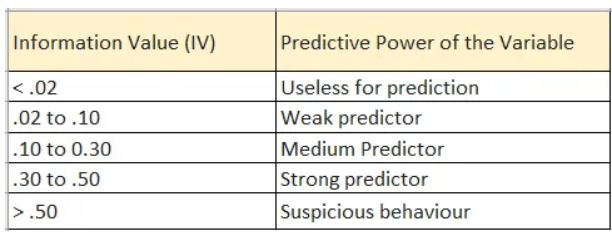

#### Para llevar a cabo esto supondremos ue un valor bueno es que tenga un rendimiento arriba de 7 el alumno, de bajo de eso consideraremos que es un valor malo.

In [ ]:
# Reportamos el informatioin value por variable
report = pd.DataFrame({})
transform['good'] = [(1 if i >= 60 else 0) for i in tranform['exam_score']]
transform['bad'] = [(1 if i < 60 else 0) for i in tranform['exam_score']]
good = transform['good'].sum()
bad = transform.shape[0] - good
for j in transform.columns:
   
    if j != 'student_id' and j != 'Month' and j != 'exam_score' and j != 'good' and j != 'bad' and j != 'range':
        tranform['range'], bins = pd.cut(transform[j],10, retbins=True)
        sum = 0
        for i in tranform['range'].unique():
            dif = transform[transform['range'] == i]['good'].sum()/good - transform[transform['range'] == i]['bad'].sum()/bad
            WOE = np.log((transform[transform['range'] == i]['good'].sum()/good)/(transform[transform['range'] == i]['bad'].sum()/bad))
            difXWOE = dif * WOE
            sum += difXWOE
        sum
    else:
        continue
    report = pd.concat([report, pd.DataFrame({'Variable': [j], 'IV': [sum]})], ignore_index=True)
    
report 

C:\Users\brand\AppData\Local\Temp\ipykernel_23196\3615271336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform['good'] = [(1 if i >= 80 else 0) for i in tranform['exam_score']]
C:\Users\brand\AppData\Local\Temp\ipykernel_23196\3615271336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transform['bad'] = [(1 if i < 80 else 0) for i in tranform['exam_score']]
C:\Users\brand\AppData\Local\Temp\ipykernel_23196\3615271336.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,Variable,IV
0,study_hours_per_day,inf
1,social_media_hours,inf
2,netflix_hours,inf
3,attendance_percentage,inf
4,sleep_hours,0.297772
5,inverse,inf
6,logmean,inf
7,squarmean,inf


#### Concluimos que las variables transformadas y continuas tienen un bajo poder predictivo con este método.